<a href="https://colab.research.google.com/github/Sagar8902/Git/blob/master/Signal_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("C:/Data/RELIANCE.csv",parse_dates = ["Date"], index_col="Date")


In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-01,14.638248,14.716795,14.541850,14.691803,1.829960,52060684
1996-01-02,14.656100,14.727506,14.470444,14.577553,1.815730,84371654
1996-01-03,14.816763,15.491551,14.656100,14.688232,1.829516,104661939
1996-01-04,14.548991,14.595404,14.356194,14.552561,1.812617,108450132
1996-01-05,14.495436,14.495436,14.327632,14.452592,1.800165,83354233
...,...,...,...,...,...,...
2024-05-03,2942.000000,2949.899902,2832.300049,2868.000000,2868.000000,8613479
2024-05-06,2871.000000,2880.000000,2836.000000,2839.050049,2839.050049,3697104
2024-05-07,2831.949951,2841.500000,2784.000000,2802.949951,2802.949951,7258736


<Axes: xlabel='Date'>

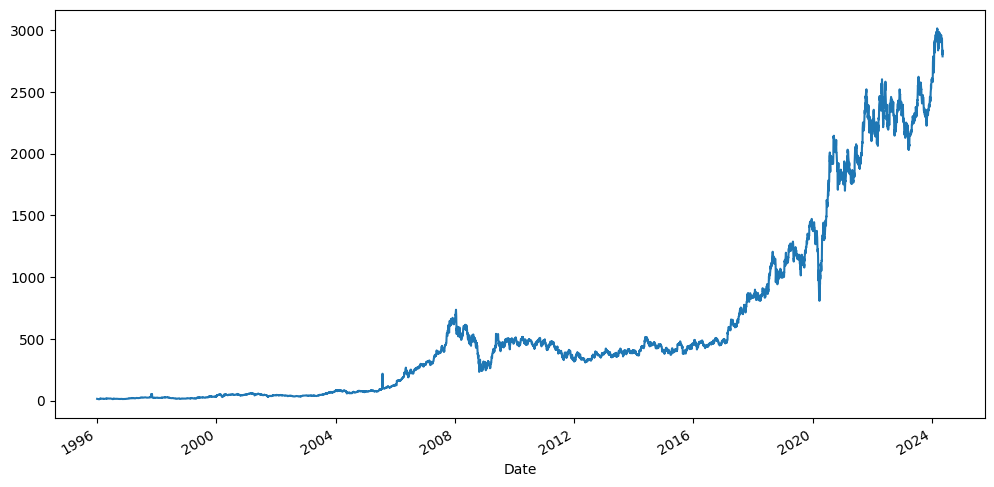

In [ ]:
data.Close.plot(figsize =(12,6))

## Stretegy:

### Golden Crossover
- When 20 SMA cross the 50 SMA then we get a buy signal
- And when 50 SMA cross the 20 SMA we get sell signal

In [ ]:
data["20_SMA"] = data.Close.rolling(window=20, min_periods=1).mean()

data["50_SMA"] = data.Close.rolling(window=50, min_periods=1).mean()

In [ ]:
data["20_SMA"]

Date
1996-01-01      14.691803
1996-01-02      14.634678
1996-01-03      14.652529
1996-01-04      14.627537
1996-01-05      14.592548
                 ...     
2024-05-03    2929.044995
2024-05-06    2923.837500
2024-05-07    2917.692493
2024-05-08    2913.537500
2024-05-09    2904.352502
Name: 20_SMA, Length: 7121, dtype: float64

In [ ]:
data["50_SMA"]

Date
1996-01-01      14.691803
1996-01-02      14.634678
1996-01-03      14.652529
1996-01-04      14.627537
1996-01-05      14.592548
                 ...     
2024-05-03    2933.621992
2024-05-06    2931.979995
2024-05-07    2929.078994
2024-05-08    2926.979995
2024-05-09    2924.036997
Name: 50_SMA, Length: 7121, dtype: float64

In [ ]:
data["Signal"] = 0
data["Signal"] = np.where(data["20_SMA"] > data["50_SMA"],1,0)

In [ ]:
data["Signal"]

Date
1996-01-01    0
1996-01-02    0
1996-01-03    0
1996-01-04    0
1996-01-05    0
             ..
2024-05-03    0
2024-05-06    0
2024-05-07    0
2024-05-08    0
2024-05-09    0
Name: Signal, Length: 7121, dtype: int32

In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume,20_SMA,50_SMA,Signal
count,7121.000000,7121.000000,7121.000000,7121.000000,7121.000000,7.121000e+03,7121.000000,7121.000000,7121.000000
mean,593.378544,600.144472,586.133678,592.872238,563.808149,3.034853e+07,589.047346,582.907718,0.593877
std,729.966300,737.039930,722.514220,729.504684,738.701557,5.159763e+07,724.450639,716.060988,0.491142
min,10.925131,10.975116,10.857296,10.975116,1.367023,0.000000e+00,12.694396,13.011742,0.000000
25%,48.898891,49.598671,48.184830,48.813202,22.378658,6.985640e+06,48.558641,48.423754,0.000000
50%,388.591400,392.660187,383.802582,387.722778,344.232819,1.253932e+07,389.066853,387.370312,1.000000
75%,620.214722,629.472351,609.402771,619.003235,553.730896,3.174766e+07,614.476157,612.563146,1.000000
max,3011.550049,3024.899902,2974.449951,3014.800049,3014.800049,7.244445e+08,2957.882495,2935.678989,1.000000


In [ ]:
data["Position"] = data.Signal.diff()

In [ ]:
data["Position"]

Date
1996-01-01    NaN
1996-01-02    0.0
1996-01-03    0.0
1996-01-04    0.0
1996-01-05    0.0
             ... 
2024-05-03    0.0
2024-05-06    0.0
2024-05-07    0.0
2024-05-08    0.0
2024-05-09    0.0
Name: Position, Length: 7121, dtype: float64

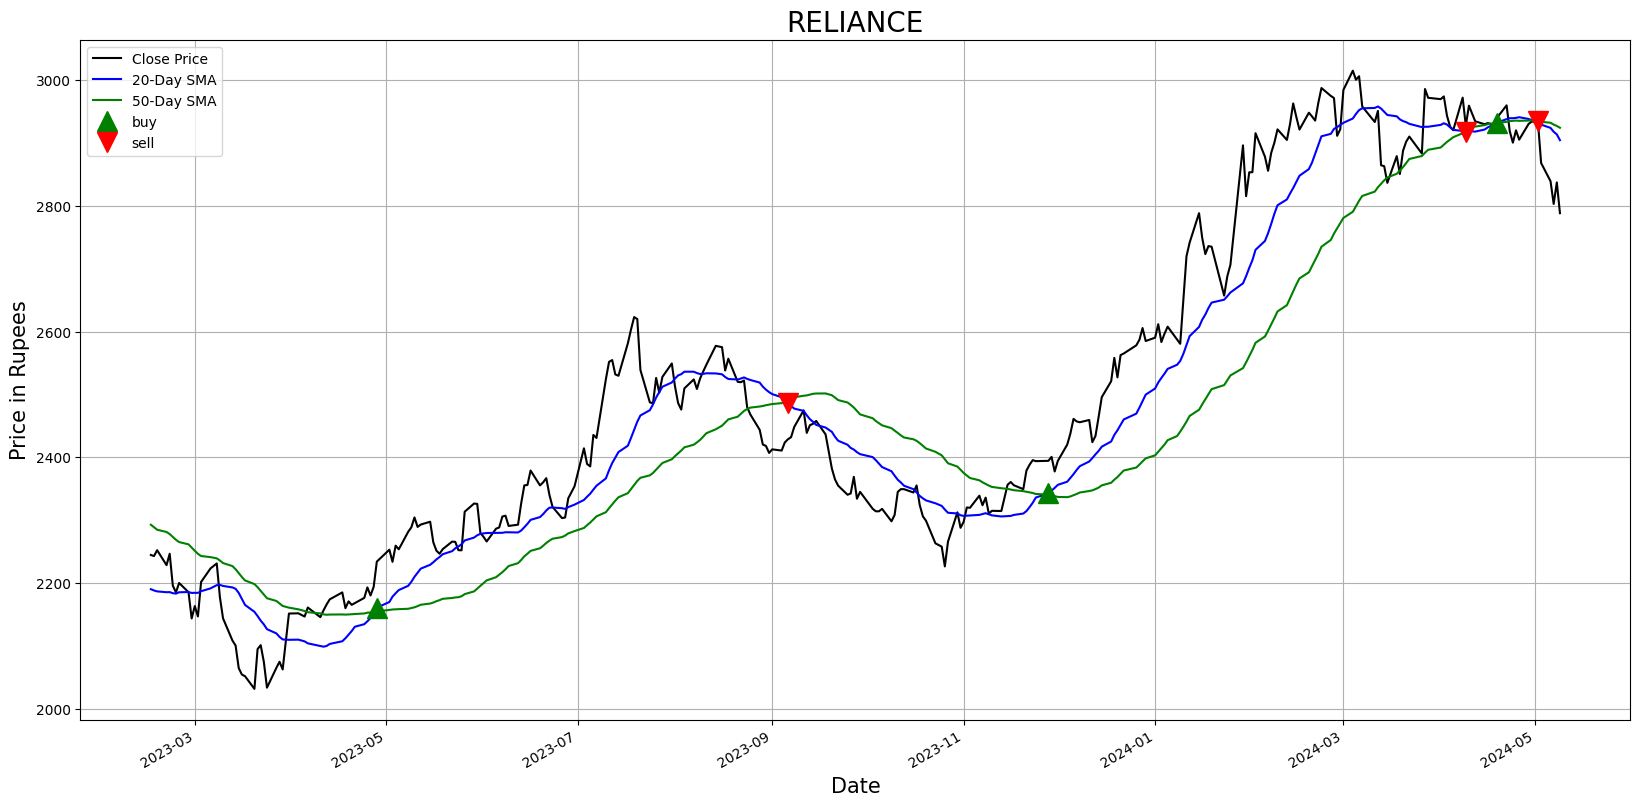

In [ ]:
plt.figure(figsize = (20,10))

# plot close price, short-term and long-term moving averages

data.iloc[-300:]["Close"].plot(color = "k", label = "Close Price")
data.iloc[-300:]["20_SMA"].plot(color = "b", label = "20-Day SMA")
data.iloc[-300:]["50_SMA"].plot(color = "g", label = "50-Day SMA")

# plot "buy" signals

plt.plot(data.iloc[-300:][data.iloc[-300:]["Position"] == 1].index,
        data.iloc[-300:]["20_SMA"][data.iloc[-300:]["Position"] == 1],
        "^", markersize = 15, color = "g", label = "buy")

# plot "sell" signals

plt.plot(data.iloc[-300:][data.iloc[-300:]["Position"] == -1].index,
        data.iloc[-300:]["20_SMA"][data.iloc[-300:]["Position"] == -1],
        "v", markersize = 15, color = "r", label = "sell")

plt.ylabel("Price in Rupees", fontsize = 15)
plt.xlabel("Date", fontsize = 15)
plt.title("RELIANCE", fontsize = 20)
plt.legend()
plt.grid()
plt.show()

In [ ]:
!pip install tabulate

In [ ]:
from tabulate import tabulate

In [ ]:
df_pos = data.iloc[-200:][(data.iloc[-200:]["Position"] == 1) | (data["Position"] == -1)].copy()
df_pos["Position"] = df_pos["Position"].apply(lambda x: "Buy" if x == 1 else "Sell")
print(tabulate(df_pos[["Close","Position"]], headers = "keys", tablefmt = "psql"))


C:\Users\abc\AppData\Local\Temp\ipykernel_9308\3921381613.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_pos = data.iloc[-200:][(data.iloc[-200:]["Position"] == 1) | (data["Position"] == -1)].copy()


+---------------------+---------+------------+
| Date                |   Close | Position   |
|---------------------+---------+------------|
| 2023-09-06 00:00:00 | 2428.7  | Sell       |
| 2023-11-28 00:00:00 | 2394.4  | Buy        |
| 2024-04-09 00:00:00 | 2927.3  | Sell       |
| 2024-04-19 00:00:00 | 2940.25 | Buy        |
| 2024-05-02 00:00:00 | 2933.1  | Sell       |
+---------------------+---------+------------+


In [ ]:
def GoldenCrossoverSignal(name, data_point):
    path = f'C:/Data/{name}.csv'
    data = pd.read_csv(path, parse_dates = ["Date"], index_col="Date")

data["20_SMA"] = data.Close.rolling(window=20, min_periods=1).mean()
data["50_SMA"] = data.Close.rolling(window=50, min_periods=1).mean()

data["Signal"] = 0
data["Signal"] = np.where(data["20_SMA"] > data["50_SMA"],1,0)
data["Position"] = data.Signal.diff()

plt.figure(figsize = (20,10))

# plot close price, short-term and long-term moving averages

data.iloc[-data_point:]["Close"].plot(color = "k", label = "Close Price")
data.iloc[-data_point:]["20_SMA"].plot(color = "b", label = "20-Day SMA")
data.iloc[-data_point:]["50_SMA"].plot(color = "g", label = "50-Day SMA")

# plot "buy" signals

plt.plot(data.iloc[-data_point:][data.iloc[-data_point:]["Position"] == 1].index,
        data.iloc[-data_point:]["20_SMA"][data.iloc[-data_point:]["Position"] == 1],
        "^", markersize = 15, color = "g", label = "buy")

# plot "sell" signals

plt.plot(data.iloc[-data_point:][data.iloc[-data_point:]["Position"] == -1].index,
        data.iloc[-data_point:]["20_SMA"][data.iloc[-data_point:]["Position"] == -1],
        "v", markersize = 15, color = "r", label = "sell")

plt.ylabel("Price in Rupees", fontsize = 15)
plt.xlabel("Date", fontsize = 15)
plt.title("RELIANCE", fontsize = 20)
plt.legend()
plt.grid()
plt.show()

df_pos = data.iloc[-data_point:][(data.iloc[-data_point:]["Position"] == 1) | (data["Position"] == -1)].copy()
df_pos["Position"] = df_pos["Position"].apply(lambda x: "Buy" if x == 1 else "Sell")
print(tabulate(df_pos[["Close","Position"]], headers = "keys", tablefmt = "psql"))

NameError: name 'data_point' is not defined

<Figure size 2000x1000 with 0 Axes>

In [ ]:
GoldenCrossoverSignal(")